In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("TSLA.CSV")

In [2]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [14]:
data[["Date","Open"]]

,Date,Open
0,2010-06-29,3.800000
1,2010-06-30,5.158000
2,2010-07-01,5.000000
3,2010-07-02,4.600000
4,2010-07-06,4.000000
...,...,...
2951,2022-03-18,874.489990
2952,2022-03-21,914.979980
2953,2022-03-22,930.000000
2954,2022-03-23,979.940002


In [15]:
data["Year"] = data["Date"].str.split("-").str[0]

In [16]:
year = data[["Year"]].value_counts()
year

Year
2020    253
2011    252
2013    252
2014    252
2015    252
2016    252
2019    252
2021    252
2017    251
2018    251
2012    250
2010    130
2022     57
dtype: int64

In [26]:
mean_open_by_year = data.groupby("Year")["Open"].mean()
mean_open_by_year_df = mean_open_by_year.reset_index()
mean_open_by_year_df.columns = ["Years","Open_Mean"]

mean_open_by_year_df

,Years,Open_Mean
0,2010,4.681600
1,2011,5.364397
2,2012,6.240624
3,2013,20.883286
4,2014,44.683079
5,2015,45.966389
6,2016,42.011690
7,2017,62.859243
8,2018,63.436693
9,2019,54.605627


In [54]:
max_open_by_year = data.groupby("Year")["Open"].max()
max_open_by_year_df = max_open_by_year.reset_index()
max_open_by_year_df.columns = ["Years","Open_Max"]

max_open_by_year_df

,Years,Open_Max
0,2010,7.174000
1,2011,6.926000
2,2012,7.638000
3,2013,38.792000
4,2014,57.534000
5,2015,56.040001
6,2016,53.290001
7,2017,77.337997
8,2018,75.000000
9,2019,87.000000


In [55]:
min_open_by_year = data.groupby("Year")["Open"].min()
min_open_by_year_df = min_open_by_year.reset_index()
min_open_by_year_df.columns = ["Years","Open_Min"]

min_open_by_year_df

,Years,Open_Min
0,2010,3.228000
1,2011,4.356000
2,2012,5.324000
3,2013,6.616000
4,2014,28.100000
5,2015,37.166000
6,2016,28.464001
7,2017,42.950001
8,2018,50.556000
9,2019,36.220001


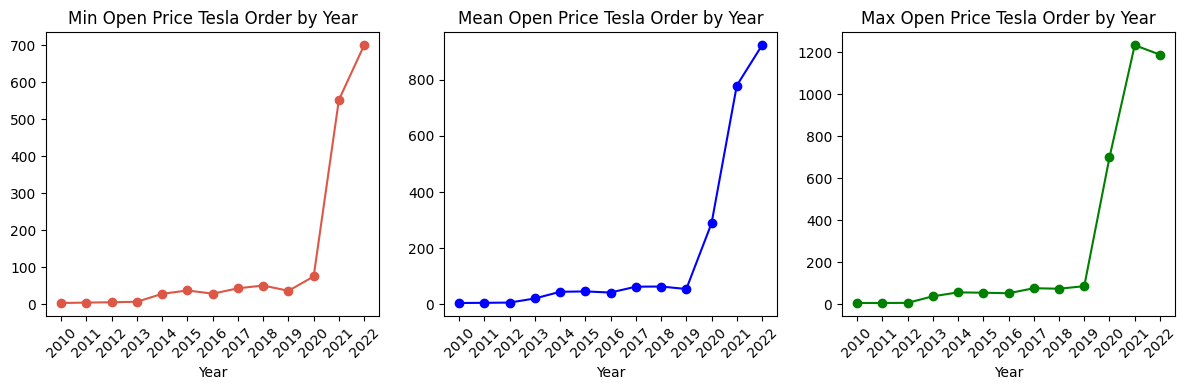

In [62]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)

xplot = min_open_by_year_df["Years"]
yplot = min_open_by_year_df["Open_Min"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="#DD5746")

plt.title("Min Open Price Tesla Order by Year")

plt.subplot(1,3,2)

xplot = mean_open_by_year_df["Years"]
yplot = mean_open_by_year_df["Open_Mean"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="blue")

plt.title("Mean Open Price Tesla Order by Year")

plt.subplot(1,3,3)

xplot = max_open_by_year_df["Years"]
yplot = max_open_by_year_df["Open_Max"]

plt.xlabel("Year")
plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="green")

plt.title("Max Open Price Tesla Order by Year")


plt.tight_layout() 
plt.show()

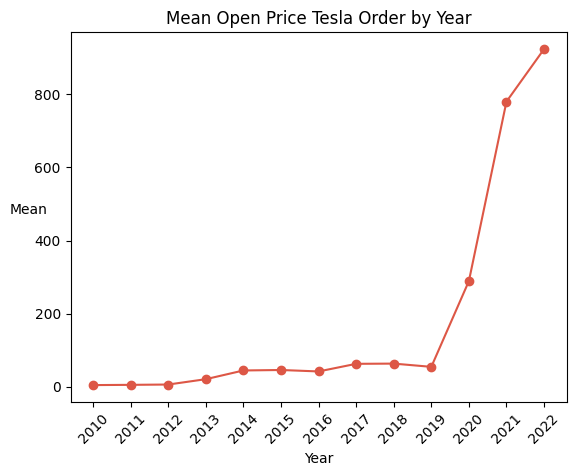

In [63]:
import matplotlib.pyplot as plt 

xplot = mean_open_by_year_df["Years"]
yplot = mean_open_by_year_df["Open_Mean"]

plt.xlabel("Year")
plt.ylabel("Mean",rotation = 0)

plt.title("Mean Open Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="#DD5746")
plt.show()

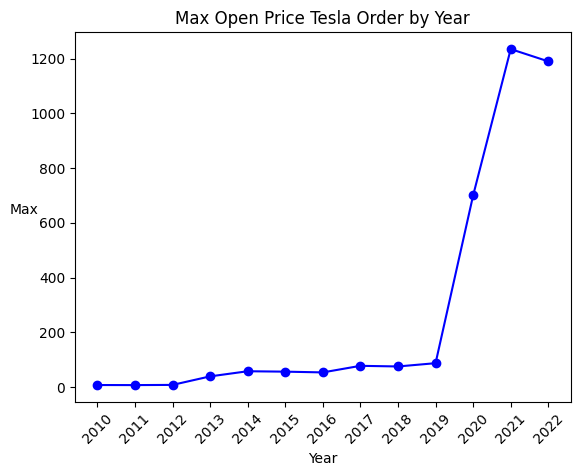

In [56]:
import matplotlib.pyplot as plt 

xplot = max_open_by_year_df["Years"]
yplot = max_open_by_year_df["Open_Max"]

plt.xlabel("Year")
plt.ylabel("Max",rotation = 0)

plt.title("Max Open Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="blue")
plt.show()

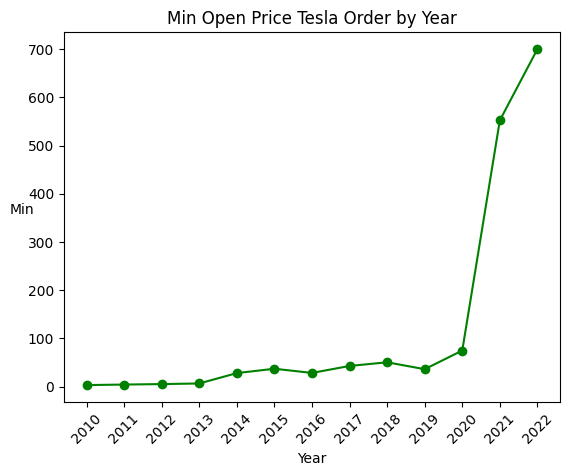

In [58]:
import matplotlib.pyplot as plt 

xplot = min_open_by_year_df["Years"]
yplot = min_open_by_year_df["Open_Min"]

plt.xlabel("Year")
plt.ylabel("Min",rotation = 0)

plt.title("Min Open Price Tesla Order by Year")

plt.xticks(rotation=45)
plt.plot(xplot,yplot,"-o",color="green")
plt.show()